In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HV1       4843 non-null   int64  
 1   IC1       4843 non-null   int64  
 2   IC2       4843 non-null   int64  
 3   IC3       4843 non-null   int64  
 4   IC4       4843 non-null   int64  
 5   IC5       4843 non-null   int64  
 6   AVGGIFT   4843 non-null   float64
 7   TARGET_D  4843 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 302.8 KB


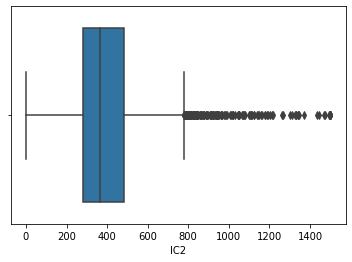

In [17]:
sns.boxplot(data['IC2'])
plt.show()

In [6]:
data.describe()['IC2']

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [8]:
iqr = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25) # data['IC1'].quantile(0.75)
iqr

198.0

In [9]:
np.percentile(data['IC2'],25), np.percentile(data['IC2'],75)

(283.0, 481.0)

In [23]:
upper_limit = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC2'],25) - 1.5*iqr
upper_limit, lower_limit

(778.0, -14.0)

In [24]:
#deleting data outliers
#data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

# cutting off outliers at upper and lower limit
data.loc[(data['IC2'] > upper_limit, 'IC2')] = upper_limit
data.loc[(data['IC2'] < lower_limit, 'IC2')] = lower_limit

<AxesSubplot:xlabel='IC2'>

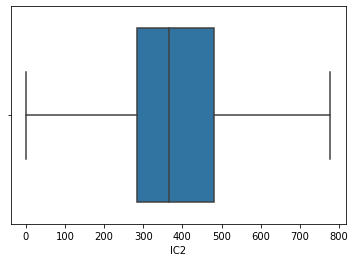

In [25]:
sns.boxplot(data['IC2'])

<AxesSubplot:xlabel='IC2'>

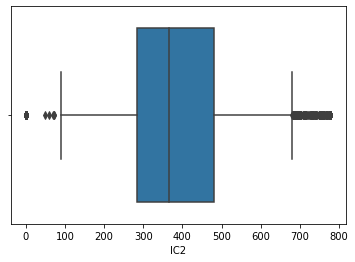

In [29]:
sns.boxplot(data['IC2'], whis=1)

<AxesSubplot:xlabel='IC5', ylabel='Density'>

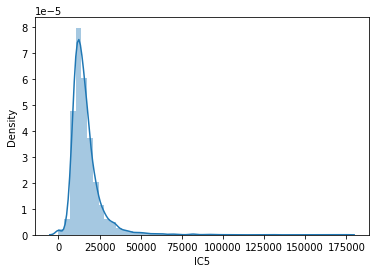

In [30]:
sns.distplot(data['IC5'])

In [37]:
data1 = data.copy()

data1['IC5'] = np.where(data['IC5']<=0, np.NAN, data['IC5'])

data1['IC5'] = data1['IC5'].fillna(data['IC5'].mean())

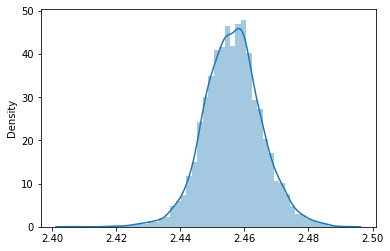

In [38]:
transformed_data, _ci = stats.boxcox(data1['IC5'])

sns.distplot(transformed_data)
plt.show()

In [40]:
data2 = pd.read_csv('regression_data.csv')
data2

,AVGGIFT,HV1_log,IC1_transformed,IC5_transformed,gender,TARGET_D
0,15.500000,7.760467,17.343389,4.181353,Male,21.0
1,3.080000,6.208590,16.230984,4.150313,Male,3.0
2,7.500000,7.113956,18.047227,4.205057,Female,20.0
3,6.700000,5.783825,11.737110,4.055333,Male,5.0
4,8.785714,6.643790,12.494862,4.088969,Female,10.0
...,...,...,...,...,...,...
4665,15.500000,6.552508,15.280561,4.187901,Male,25.0
4666,11.857143,8.118803,15.029617,4.248632,Male,19.0
4667,11.333333,6.551080,15.742430,4.179506,Female,10.0
4668,13.000000,6.398595,13.326031,4.124159,Male,25.0


In [42]:
numerical2 = data2.select_dtypes(include=[np.number])

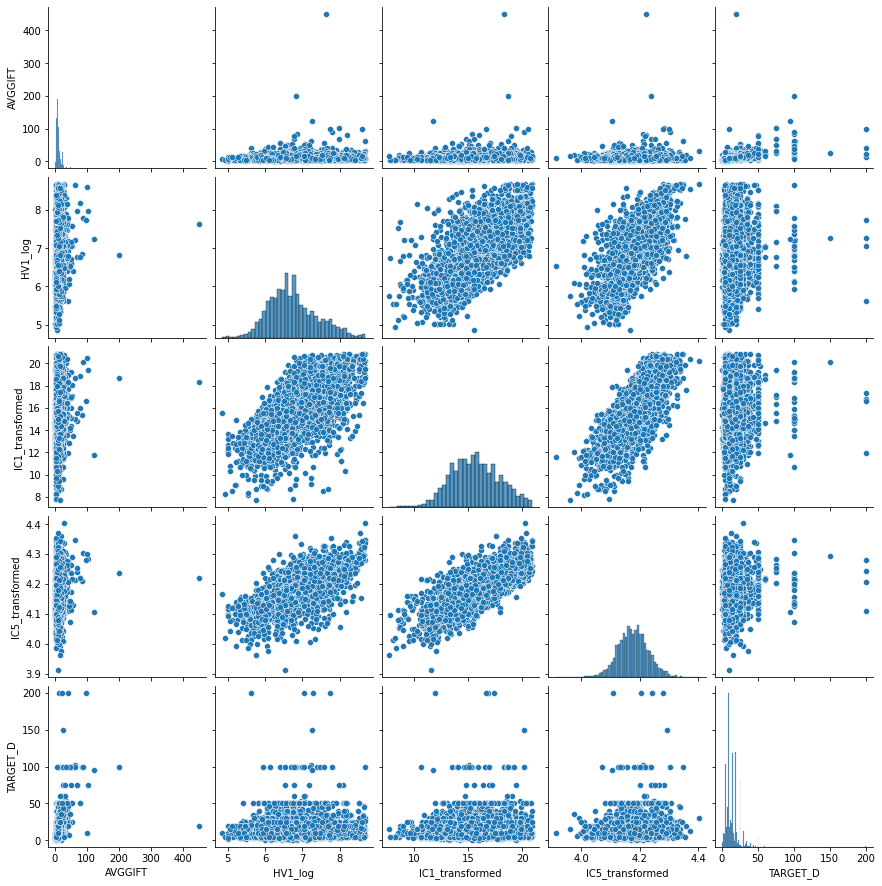

In [43]:
sns.pairplot(numerical2)

<AxesSubplot:xlabel='AVGGIFT', ylabel='Density'>

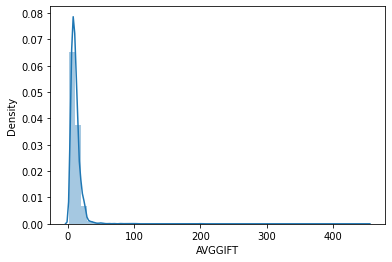

In [44]:
sns.distplot(data2['AVGGIFT'])

<AxesSubplot:xlabel='HV1_log', ylabel='Density'>

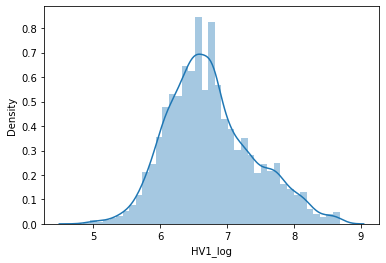

In [45]:
sns.distplot(data2['HV1_log'])

<AxesSubplot:xlabel='IC1_transformed', ylabel='Density'>

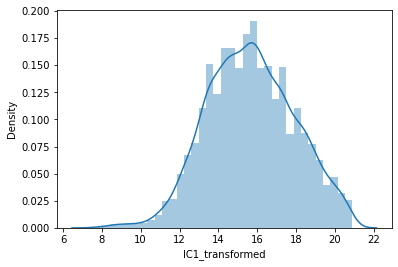

In [46]:
sns.distplot(data2['IC1_transformed'])

In [53]:
X = numerical2.drop(['TARGET_D'], axis=1)

transformer = Normalizer() 
transformer.fit(X) 

x_normalized = transformer.transform(X)

normal = pd.DataFrame(x_normalized)
x_normalized.shape

(4670, 4)

In [56]:
X.head()

,AVGGIFT,HV1_log,IC1_transformed,IC5_transformed
0,15.500000,7.760467,17.343389,4.181353
1,3.080000,6.208590,16.230984,4.150313
2,7.500000,7.113956,18.047227,4.205057
3,6.700000,5.783825,11.737110,4.055333
4,8.785714,6.643790,12.494862,4.088969


In [54]:
normal.head()

,0,1,2,3
0,0.623123,0.311982,0.697230,0.168096
1,0.169883,0.342445,0.895247,0.228918
2,0.353458,0.335264,0.850525,0.198175
3,0.439358,0.379279,0.769670,0.265932
4,0.512245,0.387362,0.728505,0.238405


<AxesSubplot:xlabel='0', ylabel='Density'>

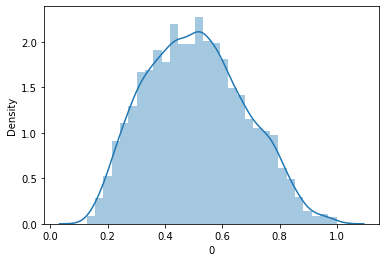

In [59]:
sns.distplot(normal[0])

<AxesSubplot:xlabel='1', ylabel='Density'>

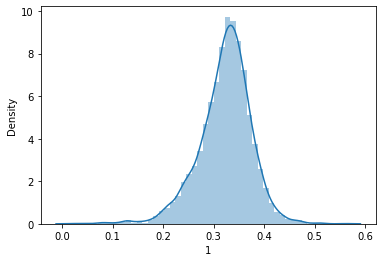

In [60]:
sns.distplot(normal[1])

<AxesSubplot:xlabel='2', ylabel='Density'>

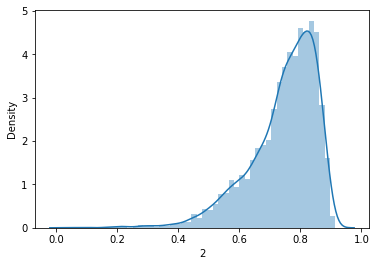

In [61]:
sns.distplot(normal[2])